In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ["Sepal length","Sepal width","Petal length", "Petal width","Class"]
df = pd.read_csv("iris.data" , header=None, names=cols)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.groupby("Class").size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

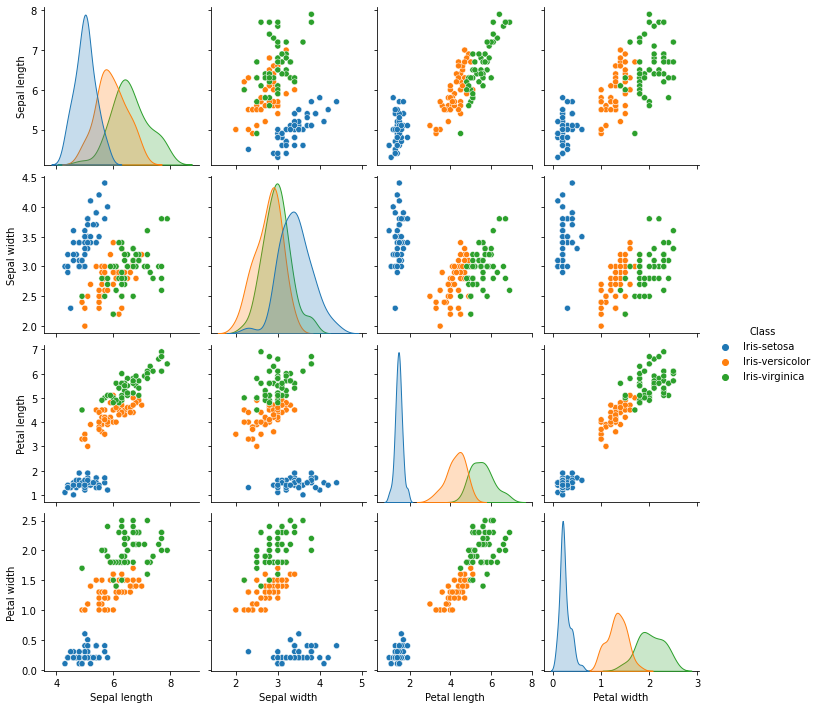

In [5]:
sns.pairplot(data=df , hue="Class")

In [6]:
df["Class"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [7]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size=0.20 , random_state=0)

In [10]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest, ypred))

In [11]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt = DecisionTreeClassifier()

In [12]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
mymodel(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [14]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
dt.score(xtrain, ytrain)

1.0

In [17]:
dt.score(xtest,ytest)

1.0

In [18]:
dt.feature_importances_

array([0.02924587, 0.        , 0.54390012, 0.426854  ])

In [19]:
dt1 = DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} :- {accuracy_score(ytest, ypred)}")

 1 :- 0.5666666666666667
 2 :- 0.9666666666666667
 3 :- 0.9666666666666667
 4 :- 1.0
 5 :- 1.0
 6 :- 1.0
 7 :- 1.0
 8 :- 1.0
 9 :- 1.0
 10 :- 1.0
 11 :- 1.0
 12 :- 1.0
 13 :- 1.0
 14 :- 1.0
 15 :- 1.0
 16 :- 1.0
 17 :- 1.0
 18 :- 1.0
 19 :- 1.0
 20 :- 1.0
 21 :- 1.0
 22 :- 1.0
 23 :- 1.0
 24 :- 1.0
 25 :- 1.0
 26 :- 1.0
 27 :- 1.0
 28 :- 1.0
 29 :- 1.0
 30 :- 1.0
 31 :- 1.0
 32 :- 1.0
 33 :- 1.0
 34 :- 1.0
 35 :- 1.0
 36 :- 1.0
 37 :- 1.0
 38 :- 1.0
 39 :- 1.0
 40 :- 1.0
 41 :- 1.0
 42 :- 1.0
 43 :- 1.0
 44 :- 1.0
 45 :- 1.0
 46 :- 1.0
 47 :- 1.0
 48 :- 1.0
 49 :- 1.0


In [21]:
dt3 = DecisionTreeClassifier(max_depth=4)
mymodel(dt3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
dt4 = DecisionTreeClassifier(min_samples_leaf=10)
mymodel(dt4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
for i in range(1,50):
    dt5 = DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} :- {accuracy_score(ytest, ypred)}")

 1 :- 1.0
 2 :- 0.9666666666666667
 3 :- 1.0
 4 :- 1.0
 5 :- 1.0
 6 :- 0.9666666666666667
 7 :- 0.9666666666666667
 8 :- 0.9666666666666667
 9 :- 0.9666666666666667
 10 :- 0.9666666666666667
 11 :- 0.9666666666666667
 12 :- 0.9666666666666667
 13 :- 0.9666666666666667
 14 :- 0.9666666666666667
 15 :- 0.9666666666666667
 16 :- 0.9666666666666667
 17 :- 0.9666666666666667
 18 :- 0.9666666666666667
 19 :- 0.9666666666666667
 20 :- 0.9666666666666667
 21 :- 0.9666666666666667
 22 :- 0.9666666666666667
 23 :- 0.9666666666666667
 24 :- 0.9666666666666667
 25 :- 0.9666666666666667
 26 :- 0.9666666666666667
 27 :- 0.9666666666666667
 28 :- 0.9666666666666667
 29 :- 0.9666666666666667
 30 :- 0.9666666666666667
 31 :- 0.9666666666666667
 32 :- 0.9666666666666667
 33 :- 0.9666666666666667
 34 :- 0.9666666666666667
 35 :- 0.9666666666666667
 36 :- 0.9666666666666667
 37 :- 0.9666666666666667
 38 :- 0.9666666666666667
 39 :- 0.9666666666666667
 40 :- 0.5666666666666667
 41 :- 0.5666666666666667
 42

In [24]:
dt6 = DecisionTreeClassifier(min_samples_leaf=1)
mymodel(dt6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
dt7 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=1)
mymodel(dt7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
dt8 = DecisionTreeClassifier(criterion='gini',max_depth=1)
mymodel(dt8)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30



In [27]:
for i in range(1,50):
    dt9 = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt9.fit(xtrain, ytrain)
    ypred = dt9.predict(xtest)
    print(f" {i} :- {accuracy_score(ytest, ypred)}")

 1 :- 0.5666666666666667
 2 :- 0.9666666666666667
 3 :- 0.9666666666666667
 4 :- 1.0
 5 :- 1.0
 6 :- 1.0
 7 :- 1.0
 8 :- 1.0
 9 :- 1.0
 10 :- 1.0
 11 :- 1.0
 12 :- 1.0
 13 :- 1.0
 14 :- 1.0
 15 :- 1.0
 16 :- 1.0
 17 :- 1.0
 18 :- 1.0
 19 :- 1.0
 20 :- 1.0
 21 :- 1.0
 22 :- 1.0
 23 :- 1.0
 24 :- 1.0
 25 :- 1.0
 26 :- 1.0
 27 :- 1.0
 28 :- 1.0
 29 :- 1.0
 30 :- 1.0
 31 :- 1.0
 32 :- 1.0
 33 :- 1.0
 34 :- 1.0
 35 :- 1.0
 36 :- 1.0
 37 :- 1.0
 38 :- 1.0
 39 :- 1.0
 40 :- 1.0
 41 :- 1.0
 42 :- 1.0
 43 :- 1.0
 44 :- 1.0
 45 :- 1.0
 46 :- 1.0
 47 :- 1.0
 48 :- 1.0
 49 :- 1.0


In [28]:
dt10 = DecisionTreeClassifier(criterion='gini',max_depth=4)
mymodel(dt10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
dt11 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
mymodel(dt11)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
dt12 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
mymodel(dt12)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30



In [31]:
for i in range(1,50):
    dt13 = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt13.fit(xtrain, ytrain)
    ypred = dt13.predict(xtest)
    print(f" {i} :- {accuracy_score(ytest, ypred)}")

 1 :- 0.5666666666666667
 2 :- 0.9666666666666667
 3 :- 0.9666666666666667
 4 :- 1.0
 5 :- 1.0
 6 :- 1.0
 7 :- 1.0
 8 :- 1.0
 9 :- 1.0
 10 :- 1.0
 11 :- 1.0
 12 :- 1.0
 13 :- 1.0
 14 :- 1.0
 15 :- 1.0
 16 :- 1.0
 17 :- 1.0
 18 :- 1.0
 19 :- 1.0
 20 :- 1.0
 21 :- 1.0
 22 :- 1.0
 23 :- 1.0
 24 :- 1.0
 25 :- 1.0
 26 :- 1.0
 27 :- 1.0
 28 :- 1.0
 29 :- 1.0
 30 :- 1.0
 31 :- 1.0
 32 :- 1.0
 33 :- 1.0
 34 :- 1.0
 35 :- 1.0
 36 :- 1.0
 37 :- 1.0
 38 :- 1.0
 39 :- 1.0
 40 :- 1.0
 41 :- 1.0
 42 :- 1.0
 43 :- 1.0
 44 :- 1.0
 45 :- 1.0
 46 :- 1.0
 47 :- 1.0
 48 :- 1.0
 49 :- 1.0


In [32]:
dt14 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
mymodel(dt14)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Final Results

In [33]:
dt15 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
mymodel(dt15)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
dt16 = DecisionTreeClassifier(criterion='gini',max_depth=4)
mymodel(dt16)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
cvs = cross_val_score(dt15, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #entropy

0.9600000000000002


In [36]:
cvs = cross_val_score(dt16, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #gini

0.9600000000000002


In [37]:
from sklearn import tree

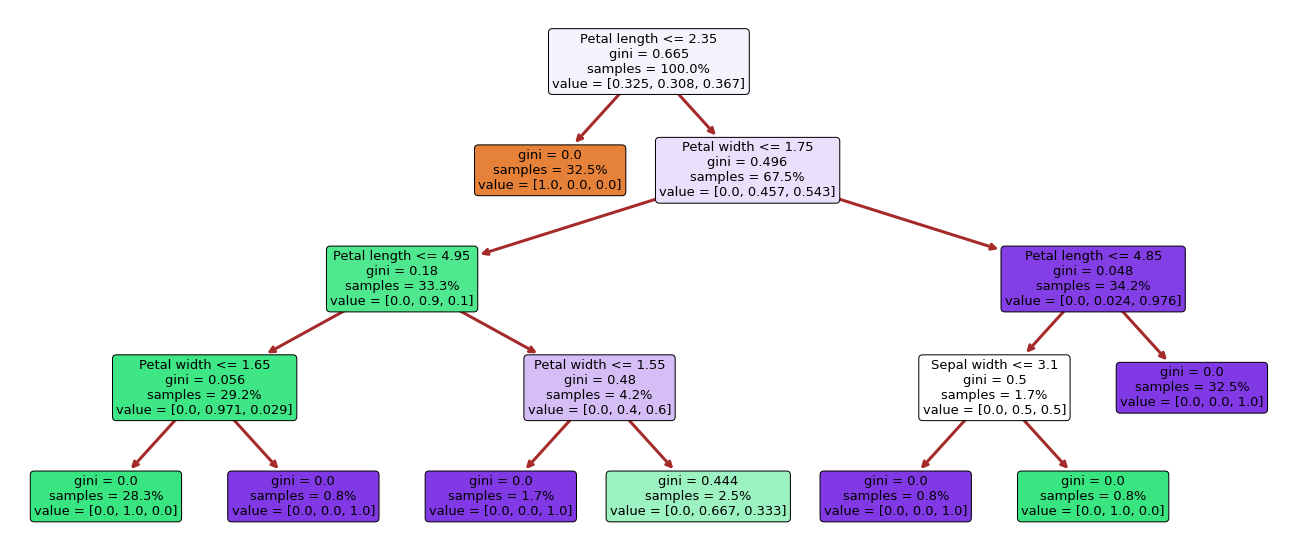

In [38]:
fig, ax = plt.subplots(figsize=(23,10))
chart = tree.plot_tree(dt16, feature_names=df.columns, fontsize=13, filled="True", proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("brown")
        arrow.set_linewidth(3)